## Extend wombat anthro co2 file co2.rcp8p5.nc beyond year 2100 

In [1]:
import xarray, matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [29]:
#only open single file
cfile ='/g/data/v45/pas561/mom/input/wombat_jun16z_bgc_sbc/co2.rcp8p5.cp.nc'
c_ds = xarray.open_dataset(cfile,decode_times=False)
c_ds


<xarray.Dataset>
Dimensions:        (bnds: 2, time: 336, xt_ocean: 1440, yt_ocean: 1080)
Coordinates:
  * xt_ocean       (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean       (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
  * time           (time) float64 1.764e+03 1.766e+03 ... 2.098e+03 2.1e+03
Dimensions without coordinates: bnds
Data variables:
    yt_ocean_bnds  (yt_ocean, bnds) float64 ...
    co2            (time, yt_ocean, xt_ocean) float32 ...
Attributes:
    history:      Mon Jul 27 11:54:51 2015: ncatted -a modulo,time,d,, co2.rc...
    Conventions:  CF-1.0

(array([3.42144e+08, 5.13216e+07, 2.95488e+07, 2.17728e+07, 1.55520e+07,
        1.39968e+07, 1.24416e+07, 1.24416e+07, 1.08864e+07, 1.24416e+07]),
 array([278.05157, 343.83386, 409.61615, 475.3984 , 541.1807 , 606.963  ,
        672.74524, 738.5275 , 804.3098 , 870.0921 , 935.8744 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

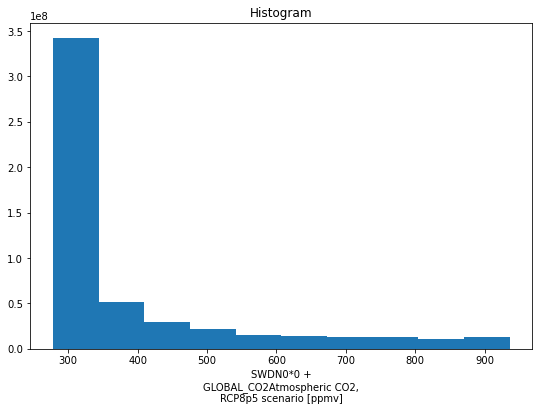

In [11]:
c_ds.co2
co2 = c_ds.co2
co2.shape
co2.plot(size=6)

In [28]:
c_ds.time
#time=c_ds.time[:].load()

c2=xarray.concat(c_ds.co2, c_ds.co2, dim="time")
c2.shape

TypeError: concat() got multiple values for argument 'dim'

In [48]:

%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
from netCDF4 import MFDataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

Populating the interactive namespace from numpy and matplotlib


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [49]:

nc = Dataset(cfile, mode='r') # file handle, open in read only mode
vc = nc.variables['co2'][:]
vt = nc.variables['time'][:]
nc.close() # close the file

vc.shape, vt.shape


((336, 1080, 1440), (336,))

In [50]:
v2c = vc.copy()
v2c[:,:,:] = vc[335,:,:] #uf[:,lat_start:lat_end+1, lon_start:lon_end+1]

v2t = vt.copy()
v2t = vt[:]+336
v2t[0],v2t[-1:]

(2100.5,
 masked_array(data=[2435.5],
              mask=False,
        fill_value=1e+20))

In [51]:

#this works
c2file='/g/data/v45/pas561/mom/input/wombat_jun16z_bgc_sbc/co2.rcp8p5.2100fix.nc'

ofile = nc4.Dataset(c2file, 'a')

var = ofile.variables['co2']
var.shape
v2c.shape
var[:] = v2c

var = ofile.variables['time']
var.shape
v2t.shape
var[:] = v2t

ofile.sync()
ofile.close()